In [12]:
import pandas as pd
import os
import sqlite3
import numpy as np 
from lets_plot import*
LetsPlot.setup_html()
import matplotlib.pyplot as plt

In [13]:
# pip install matplotlib

In [14]:
filename='D:/me204/Meesho Project/Data/Raw/Meesho_Project_Uncleaning.csv'
meesho_project=pd.read_csv(filename)

In [15]:
meesho_project

,names,sizes,prices,fabrics,sleeves,net_quantities,patterns,ratings,delivery_
0,Zamaisha Rayon Tops & Tunics,XS,242,Rayon,Three-Quarter Sleeves,1,Printed,4.0,Free Delivery
1,Pretty Graceful Women Tops & Tunics,XXS,155,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
2,Pretty Latest Women Tops & Tunics,XXS,153,Cotton,Long Sleeves,1,Solid,4.0,Free Delivery
3,Trendy Glamorous Women Tops & Tunics,XS,203,Cotton,Long Sleeves,1,Solid,4.2,Free Delivery
4,Stylish Fabulous Women Tops & Tunics,XS,164,Cotton,Long Sleeves,1,Solid,4.1,Free Delivery
5,Fancy Glamorous Women Tops & Tunics,M,251,Rayon,Three-Quarter Sleeves,,Printed,4.0,Free Delivery
6,Aagyeyi Pretty Tops & Tunics,S,281,Crepe,Three-Quarter Sleeves,2,Printed,3.7,Free Delivery
7,Trendy Sensational Women Tops & Tunics,XS,179,Lycra,Long Sleeves,1,Solid,4.0,Free Delivery
8,Classic Designer Women Tops & Tunics,S,201,Georgette,Three-Quarter Sleeves,1,Chikankari,3.9,Free Delivery
9,Classy Elegant Women & Tunics,S,248,Rayon,Three-Quarter Sleeves,1,Printed,4.0,Free Delivery


In [16]:
columns_int = ['prices', 'net_quantities', 'ratings']
meesho_project['prices'] = meesho_project['prices'].replace('₹', '', regex=True)  # Remove rupee symbol
meesho_project[columns_int] = meesho_project[columns_int].apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set to NaN

# Now rename and convert columns to Int64
meesho_project.rename(columns={'Unnamed: 0': 'Product_id',
                   'delivery_':'Delivary'}, inplace=True)

meesho_project[columns_int] = meesho_project[columns_int].astype('Int64', errors='ignore')

In [17]:
# Now rename and convert columns to Int64
meesho_project.rename(columns={'names': 'names',
                               'sizes': 'Sizes',
                               'prices': 'Prices',
                               'fabrics': 'Fabrics',
                               'sleeves': 'Sleeves',
                               'net_quantities': 'Net_quantities',
                               'patterns': 'Patterns',
                   'ratings':'Ratings'}, inplace=True)

In [18]:
meesho_project

,names,Sizes,Prices,Fabrics,Sleeves,Net_quantities,Patterns,Ratings,Delivary
0,Zamaisha Rayon Tops & Tunics,XS,242,Rayon,Three-Quarter Sleeves,1,Printed,4.0,Free Delivery
1,Pretty Graceful Women Tops & Tunics,XXS,155,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
2,Pretty Latest Women Tops & Tunics,XXS,153,Cotton,Long Sleeves,1,Solid,4.0,Free Delivery
3,Trendy Glamorous Women Tops & Tunics,XS,203,Cotton,Long Sleeves,1,Solid,4.2,Free Delivery
4,Stylish Fabulous Women Tops & Tunics,XS,164,Cotton,Long Sleeves,1,Solid,4.1,Free Delivery
5,Fancy Glamorous Women Tops & Tunics,M,251,Rayon,Three-Quarter Sleeves,<NA>,Printed,4.0,Free Delivery
6,Aagyeyi Pretty Tops & Tunics,S,281,Crepe,Three-Quarter Sleeves,2,Printed,3.7,Free Delivery
7,Trendy Sensational Women Tops & Tunics,XS,179,Lycra,Long Sleeves,1,Solid,4.0,Free Delivery
8,Classic Designer Women Tops & Tunics,S,201,Georgette,Three-Quarter Sleeves,1,Chikankari,3.9,Free Delivery
9,Classy Elegant Women & Tunics,S,248,Rayon,Three-Quarter Sleeves,1,Printed,4.0,Free Delivery


In [ ]:
Meesho_Project = "D:/me204/Meesho Project/Data/Clean/Meesho_Project_Data.csv"
Meesho_Project_Data = pd.read_csv(Meesho_Project)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/me204/Meesho_Project_Data.csv'

In [ ]:
conn = sqlite3.connect(os.path.join('../data', 'meesho.db'))

In [ ]:
df.to_sql('Meesho_products' ,conn, if_exists='replace', index=False)

NameError: name 'df' is not defined

In [ ]:
meesho_product=conn.execute('''
    select * from Meesho_products
''').fetchall()

In [ ]:
meesho_df=df = pd.DataFrame(meesho_product, columns=['product_id', 'names','sizes','prices', 'fabrics', 'sleeves','net_quantities','patterns', 'ratings','delivery'])

In [ ]:
meesho_df.shape

(20, 10)

In [ ]:
meesho_df

NameError: name 'meesho_df' is not defined

In [ ]:
ggplot (df, aes(x='fabrics',y='sizes')) + \
    geom_bar(star='identify',fill='green') + \
    ggtitle('Number of fabrics by Ratings') + \
    xlab('Fabrics') + \
    ylab('Ratings') + \
    theme(axis_text_x=element_text(angle=45,hjust=1)
    )

In [ ]:
import pandas as pd
import plotly.express as px
df = pd.DataFrame(meesho_df)

# Assuming columns: 'Category', 'Subcategory', 'Sales'
fig = px.sunburst(df, path=['patterns', 'fabrics'], values='prices', title="Sales Distribution by Category")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

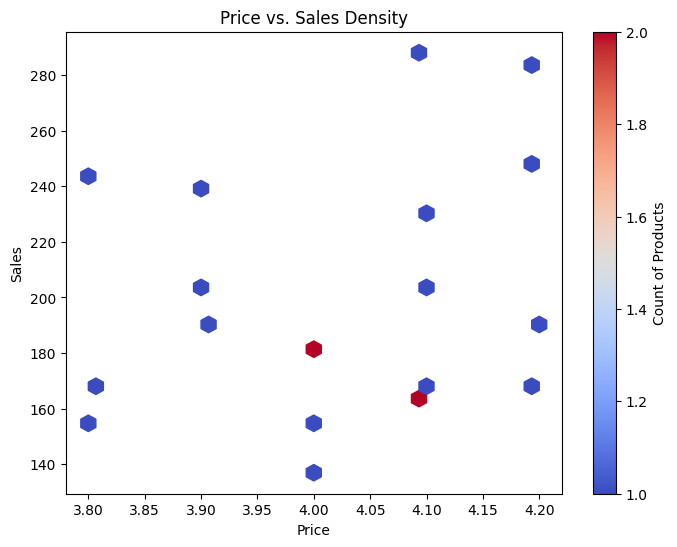

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(df['ratings'], df['prices'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label="Count of Products")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Price vs. Sales Density")
plt.show()

In [ ]:
(
    ggplot(data = meesho_df, mapping = aes(
                    x = 'prices', 
                    y = 'fabrics', 
                    color = 'prices', 
                    size = 'sizes')
             ) +
        geom_point(alpha=0.5) +
        scale_x_log10() 
)

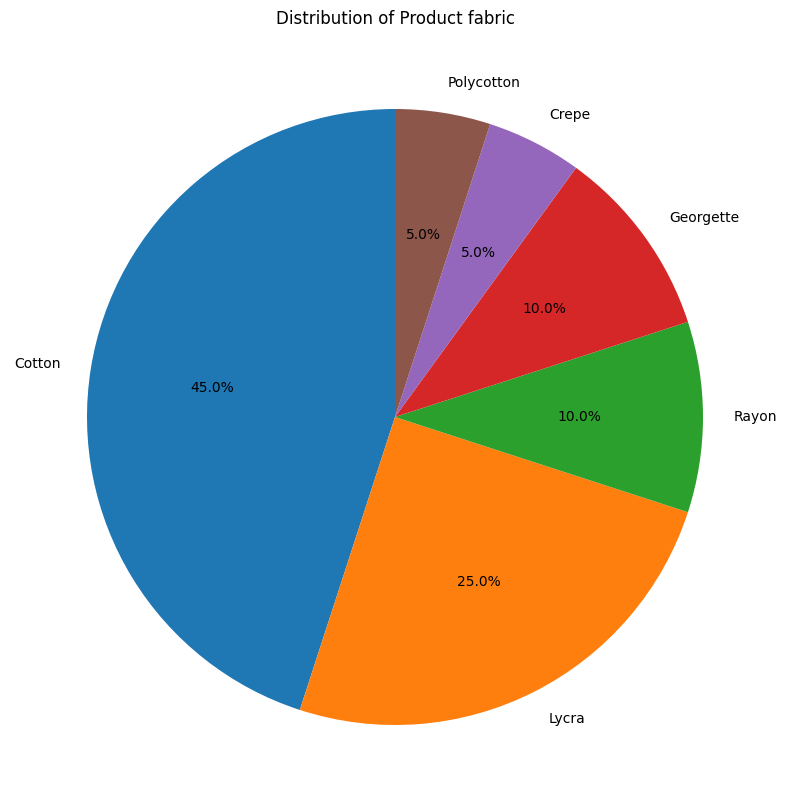

In [ ]:
df = pd.DataFrame(meesho_df)

# Calculate the count of each rating value
fabrics_counts = df['fabrics'].value_counts()

# Plot pie chart
plt.figure(figsize=(20,10))
plt.pie(fabrics_counts, labels=fabrics_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product fabric')
plt.show()

In [ ]:
# df = pd.DataFrame(meesho_df)

# # Calculate the count of each rating value
# rating_counts = df['ratings'].value_counts()

# # Plot pie chart
# plt.figure(figsize=(20,10))
# plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Product Ratings')
# plt.show()

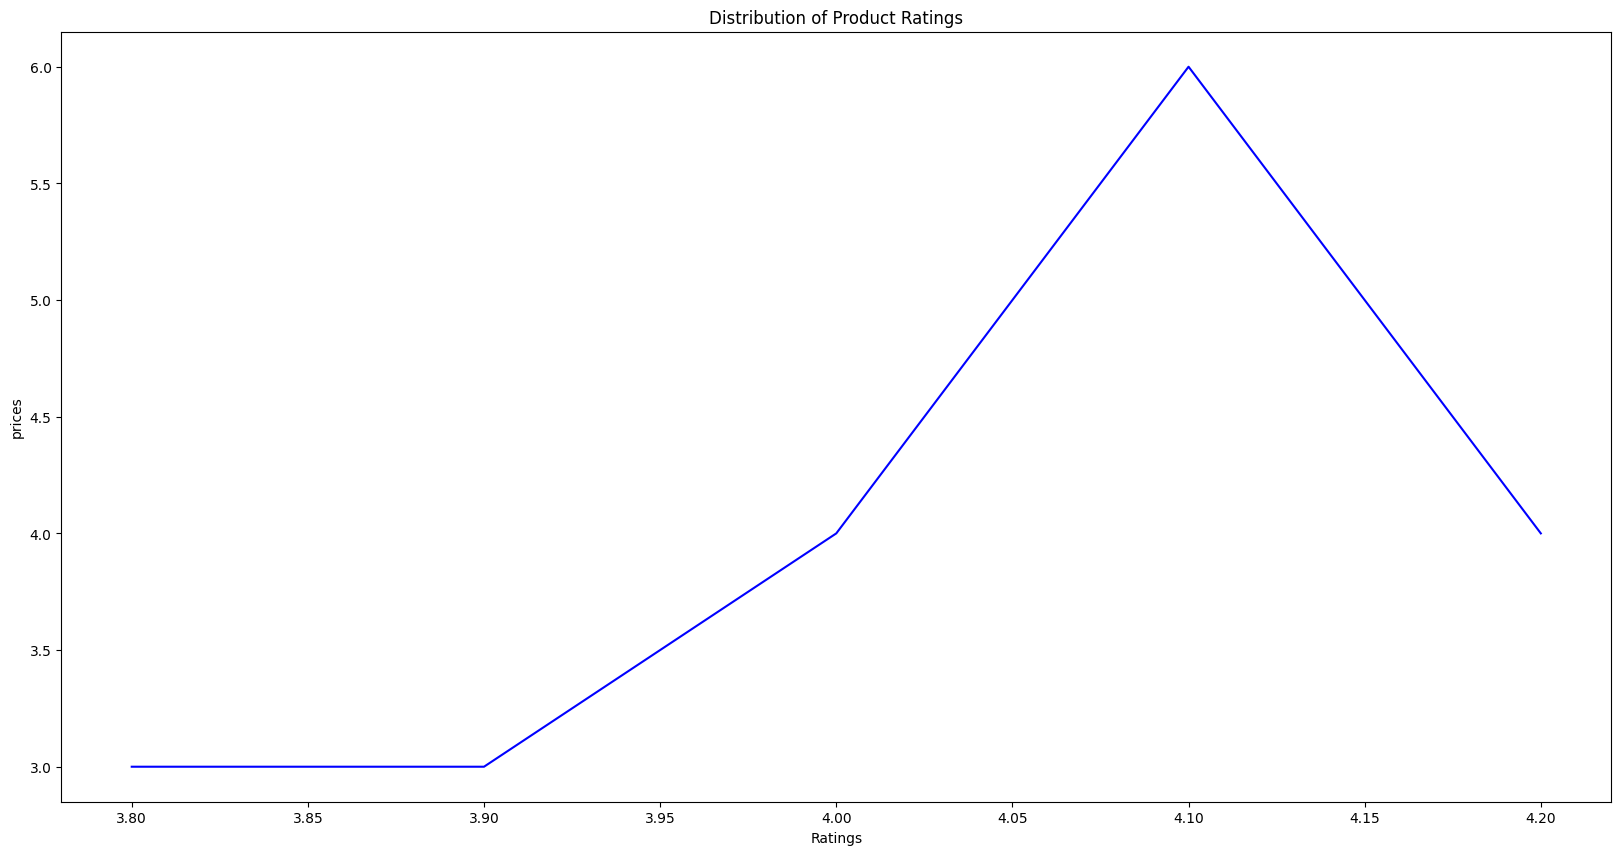

In [ ]:
df = pd.DataFrame(meesho_df)

# Calculate the count of each rating value
rating_counts = df['ratings'].value_counts()

# Plot bar chart
plt.figure(figsize=(20,10))
rating_counts.sort_index().plot(kind='line', color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('prices')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

In [ ]:


# df = pd.DataFrame(meesho_df)

# # Convert sizes to a categorical variable and then sort by sizes
# size_order = ['XXS', 'XS', 'S', 'Free Size']
# df['sizes'] = pd.Categorical(df['sizes'], categories=size_order, ordered=True)

# # Sorting by size
# df_sorted = df.sort_values(by='sizes')

# # Plotting the line chart
# plt.figure(figsize=(10, 6))
# plt.plot(df_sorted['sizes'], df_sorted['prices'], marker='o', linestyle='-', color='b')

# # Adding titles and labels
# plt.title('Prices by Size')
# plt.xlabel('Size')
# plt.ylabel('Price (in ₹)')
# plt.grid(True)

# # Display the plot
# plt.show()

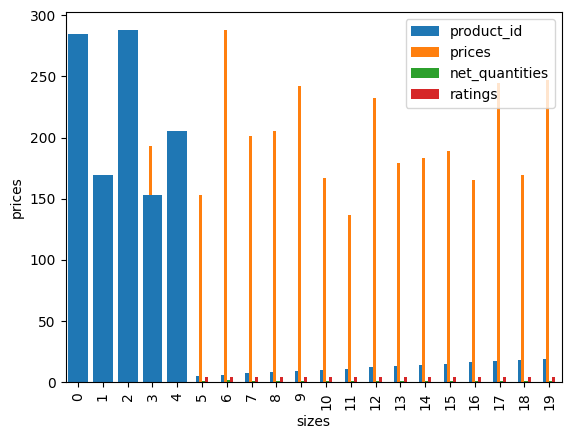

In [ ]:
# Dataframe of previous code is used here

# Plot the bar chart for numeric values
# a comparison will be shown between
# all 3 age, income, sales
df = pd.DataFrame(meesho_df)
df.plot.bar()

# plot between 2 attributes
plt.bar(df['sizes'], df['prices'])
plt.xlabel("sizes")
plt.ylabel("prices")
plt.show()

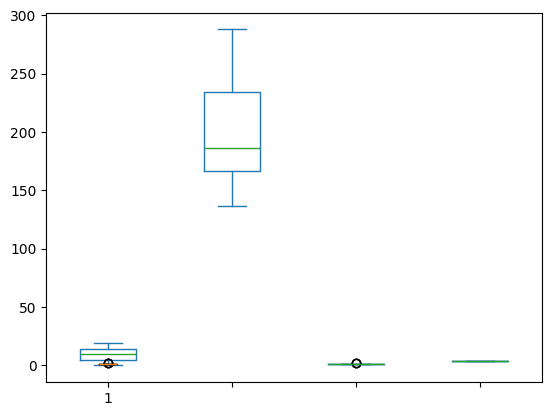

In [ ]:
# For each numeric attribute of dataframe
df = pd.DataFrame(meesho_df)
df.plot.box()

# individual attribute box plot
plt.boxplot(df['net_quantities'])
plt.show()

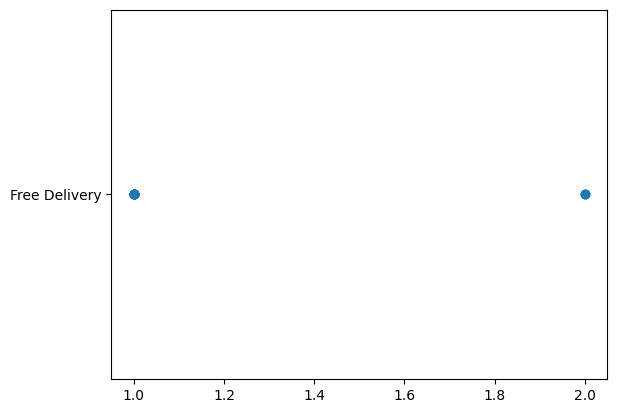

In [ ]:

# scatter plot between income and age
df = pd.DataFrame(meesho_df)
plt.scatter(df['net_quantities'], df['delivery'])
plt.show()

In [ ]:
# ! pip install seaborn 



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# ! pip install plotly


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install seaborn[stars]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=df["category"].value_counts().index, y=df["category"].value_counts().values, palette="coolwarm")
plt.title("Category-Wise Sales Distribution")
plt.xlabel("Product Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()


KeyError: 'category'

<Figure size 1000x600 with 0 Axes>

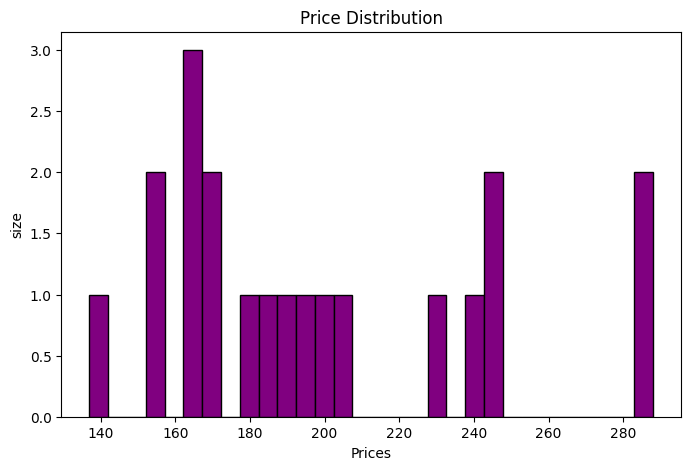

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["prices"], bins=30, color="purple", edgecolor="black")
plt.xlabel("Prices")
plt.ylabel("size")
plt.title("Price Distribution")
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'Trendy Glamorous Women Tops & Tunics'

<Figure size 1000x600 with 0 Axes>

In [ ]:
meesho_df

,product_id,names,sizes,prices,fabrics,sleeves,net_quantities,patterns,ratings,delivery
0,0,Trendy Glamorous Women Tops & Tunics,S,285,Rayon,Three-Quarter Sleeves,1,Printed,4.2,Free Delivery
1,1,Pretty Graceful Women Tops & Tunics,XXS,169,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
2,2,Stylish Fabulous Women Tops & Tunics,XS,164,Cotton,Long Sleeves,1,Solid,4.1,Free Delivery
3,3,Trendy Designer Women Tops & Tunics,XS,193,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
4,4,Trendy Latest Women Tops & Tunics,XS,154,Cotton,Long Sleeves,1,Solid,4.0,Free Delivery
5,5,Kashvi Superior Kurtis,Free Size,153,Crepe,Three-Quarter Sleeves,1,Chikankari,3.8,Free Delivery
6,6,Trendy Graceful Women Tops & Tunics,XS,288,Cotton,Long Sleeves,2,Solid,4.1,Free Delivery
7,7,Classic Designer Women Tops & Tunics,S,201,Georgette,Three-Quarter Sleeves,1,Chikankari,3.9,Free Delivery
8,8,Pretty Glamorous Women Tops & Tunics,M,205,Rayon,Three-Quarter Sleeves,1,Printed,4.1,Free Delivery
9,9,Trendy Feminine Women Tops & Tunics,XS,242,Cotton,Long Sleeves,1,Solid,3.9,Free Delivery


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=meesho_df["ratings"].value_counts().index, y=meesho_df["category"].value_counts().values, palette="coolwarm")
plt.title("Category-Wise Sales Distribution")
plt.xlabel("Product Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

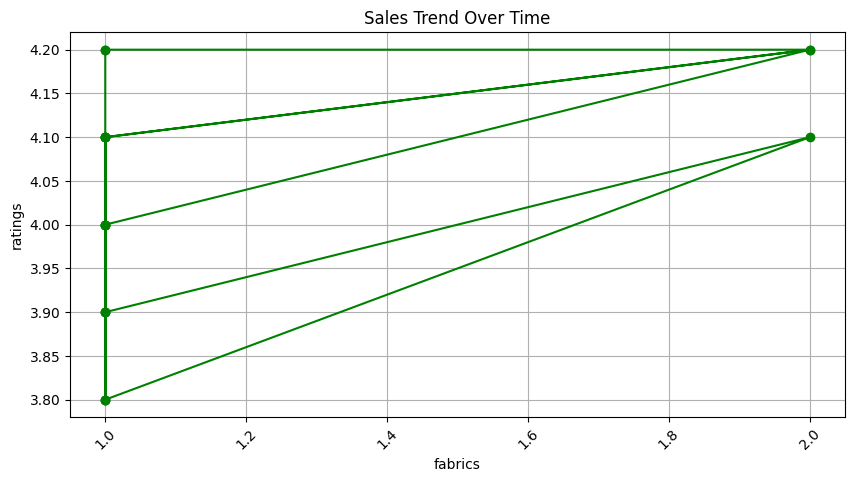

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(meesho_df)

# # Convert 'order_date' to datetime
# df["order_date"] = pd.to_datetime(df["order_date"])

# # Group sales by date
# df_sales = df.groupby(df["order_date"].dt.date)["sales"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(meesho_df["net_quantities"], meesho_df["ratings"], marker='o', linestyle='-', color='green')
plt.xlabel("fabrics")
plt.ylabel("ratings")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
meesho_df

,product_id,names,sizes,prices,fabrics,sleeves,net_quantities,patterns,ratings,delivery
0,0,Trendy Glamorous Women Tops & Tunics,S,285,Rayon,Three-Quarter Sleeves,1,Printed,4.2,Free Delivery
1,1,Pretty Graceful Women Tops & Tunics,XXS,169,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
2,2,Stylish Fabulous Women Tops & Tunics,XS,164,Cotton,Long Sleeves,1,Solid,4.1,Free Delivery
3,3,Trendy Designer Women Tops & Tunics,XS,193,Lycra,Sleeveless,2,Solid,4.2,Free Delivery
4,4,Trendy Latest Women Tops & Tunics,XS,154,Cotton,Long Sleeves,1,Solid,4.0,Free Delivery
5,5,Kashvi Superior Kurtis,Free Size,153,Crepe,Three-Quarter Sleeves,1,Chikankari,3.8,Free Delivery
6,6,Trendy Graceful Women Tops & Tunics,XS,288,Cotton,Long Sleeves,2,Solid,4.1,Free Delivery
7,7,Classic Designer Women Tops & Tunics,S,201,Georgette,Three-Quarter Sleeves,1,Chikankari,3.9,Free Delivery
8,8,Pretty Glamorous Women Tops & Tunics,M,205,Rayon,Three-Quarter Sleeves,1,Printed,4.1,Free Delivery
9,9,Trendy Feminine Women Tops & Tunics,XS,242,Cotton,Long Sleeves,1,Solid,3.9,Free Delivery


In [ ]:
df = pd.DataFrame(meesho_df)
plt.figure(figsize=(20,10))
plt.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


NameError: name 'pd' is not defined

In [ ]:
df = pd.DataFrame(meesho_df)
plt.figure(figsize=(8, 5))
plt.boxplot(x=df["prices"], color="blue")
plt.title("Price Distribution - Outliers Detection", fontsize=14)
plt.xlabel("prices")
plt.show()

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Meesho dataset (Replace with your actual dataset)
df = pd.read_csv("meesho_data.csv")

# Display basic dataset information
print(df.head())

# ------------------------- HEATMAP: Feature Correlations -------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# # ------------------------- BOX PLOT: Price Distribution -------------------------
# plt.figure(figsize=(8, 5))
# sns.boxplot(x=df["price"], color="blue")
# plt.title("Price Distribution - Outliers Detection", fontsize=14)
# plt.xlabel("Price")
# plt.show()

# # ------------------------- SALES TREND OVER TIME -------------------------
# df["order_date"] = pd.to_datetime(df["order_date"])
# df_sales = df.groupby(df["order_date"].dt.date)["sales"].sum().reset_index()

# fig = px.line(df_sales, x="order_date", y="sales", title="Sales Trend Over Time", 
#               labels={"order_date": "Date", "sales": "Total Sales"}, line_shape="spline")
# fig.show()

# # ------------------------- CATEGORY-WISE SALES DISTRIBUTION -------------------------
# plt.figure(figsize=(10, 6))
# sns.barplot(x=df["category"].value_counts().index, y=df["category"].value_counts().values, palette="viridis")
# plt.title("Top Categories by Sales Count", fontsize=14)
# plt.xlabel("Category")
# plt.ylabel("Number of Sales")
# plt.xticks(rotation=45)
# plt.show()

# # ------------------------- DONUT CHART: Order Status Distribution -------------------------
# order_status_counts = df["order_status"].value_counts()

# plt.figure(figsize=(7, 7))
# plt.pie(order_status_counts, labels=order_status_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# plt.gca().add_artist(centre_circle)
# plt.title("Order Status Distribution", fontsize=14)
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'meesho_data.csv'

In [ ]:
import pandas as pd

# Load Meesho dataset (Replace 'meesho_data.csv' with your actual file)
df = pd.read_csv("meesho_df")

# Display first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'meesho_df'

In [ ]:
import matplotlib.pyplot as plt

# Convert 'order_date' to datetime format
df["order_date"] = pd.to_datetime(df["order_date"])

# Aggregate sales per day
df_sales = df.groupby(df["order_date"].dt.date)["sales"].sum().reset_index()

# Line chart for sales trend
plt.figure(figsize=(10, 5))
plt.plot(df_sales["order_date"], df_sales["sales"], marker='o', linestyle='-', color='blue')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


KeyError: 'order_date'

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=df["category"].value_counts().index, y=df["category"].value_counts().values, palette="coolwarm")
plt.title("Category-Wise Sales Distribution")
plt.xlabel("Product Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()


KeyError: 'category'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["price"], bins=30, color="purple", edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Price Distribution")
plt.show()


KeyError: 'price'

<Figure size 800x500 with 0 Axes>

In [ ]:
order_status_counts = df["order_status"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Order Status Distribution")
plt.show()


KeyError: 'order_status'

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import plotly.express as px

fig = px.line(df_sales, x="order_date", y="sales", title="Sales Trend Over Time",
              labels={"order_date": "Date", "sales": "Total Sales"}, line_shape="spline")
fig.show()
